# Table of Content
1. Introduction
    * Set up Machine and Preparations
    * Tools
    * Libraries
2. Data
3. Review dataset
    * Iowa Vodka Data Column
    * Sampling
    * Preprocessing data
4. Exploration
    * Correlation
    * Sales of liquor by time
    * Liquor purchases by the day of the week
    * Sales of liquor per category all time
    * Sales of liquor per city all time
    * Brand sales over 2017-2021
5. Forecasting with Prophet

In [1]:
import bq_helper
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from bq_helper import BigQueryHelper
from pandas_profiling import ProfileReport
from plotly.offline import init_notebook_mode, iplot

In [2]:
ils = bq_helper.BigQueryHelper(
    active_project="bigquery-public-data", dataset_name="iowa_liquor_sales"
)

Using Kaggle's public dataset BigQuery integration.


In [3]:
BigQueryHelper("bigquery-public-data", "iowa_liquor_sales").list_tables()

Using Kaggle's public dataset BigQuery integration.


['sales']

In [4]:
query = """SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales` LIMIT 1;"""
ils.query_to_pandas_safe(query, max_gb_scanned=10).columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

| Field name | Description |
|-|-|
| invoice_and_item_number | Concatenated invoice and line number associated with the liquor order. This provides a unique identifier for the individual liquor products included in the store order. |
| date | Date of order |
| store_number | Unique number assigned to the store who ordered the liquor. |
| store_name | Name of store who ordered the liquor. |
| address | Address of store who ordered the liquor. |
| city | City where the store who ordered the liquor is located |
| zip_code | Zip code where the store who ordered the liquor is located |
| store_location | Location of store who ordered the liquor. The Address, City, State and Zip Code are geocoded to provide geographic coordinates. Accuracy of geocoding is dependent on how well the address is interpreted and the completeness of the reference data used. |
| county_number | Iowa county number for the county where store who ordered the liquor is located |
| county | County where the store who ordered the liquor is located |
| category | Category code associated with the liquor ordered |
| category_name | Category of the liquor ordered. |
| vendor_number | The vendor number of the company for the brand of liquor ordered |
| vendor_name | The vendor name of the company for the brand of liquor ordered |
| item_number | Item number for the individual liquor product ordered. |
| item_description | Description of the individual liquor product ordered. |
| pack | The number of bottles in a case for the liquor ordered |
| bottle_volume_ml | Volume of each liquor bottle ordered in milliliters. |
| state_bottle_cost | The amount that Alcoholic Beverages Division paid for each bottle of liquor ordered |
| state_bottle_retail | The amount the store paid for each bottle of liquor ordered |
| bottles_sold | The number of bottles of liquor ordered by the store |
| sale_dollars | Total cost of liquor order (number of bottles multiplied by the state bottle retail) |
| volume_sold_liters | Total volume of liquor ordered in liters. (i.e. (Bottle Volume (ml) x Bottles Sold)/1,000) |
| volume_sold_gallons | Total volume of liquor ordered in gallons. (i.e. (Bottle Volume (ml) x Bottles Sold)/3785.411784) |

In [5]:
%%time
query = """SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE RAND() < 0.1;"""
df = ils.query_to_pandas_safe(query, max_gb_scanned=10)

CPU times: user 2min 31s, sys: 9.92 s, total: 2min 41s
Wall time: 7min 27s


In [6]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S07541200001,2012-09-05,4300,Fareway Stores #625 / Oskaloosa,311 3RD AVE W,OSKALOOSA,52577,POINT (-92.648062 41.292614),62,Mahaska,...,86764,Sipp'n Sweet Corn,12,375,10.50,15.75,60,945.00,22.5,5.94
1,INV-29358900003,2020-08-10,5298,DeWitt Travel Mart,"630, 6th Ave",DeWitt,52742,POINT (-90.538952 41.821779),23,CLINTON,...,18350,Four Roses Single Barrel,6,750,21.17,31.76,18,571.68,13.5,3.56
2,S19408600102,2014-06-09,4619,Smokin' Joe's #3 Tobacco and Liquor,1737 AVE H,FORT MADISON,52627,POINT (-91.32982400000002 40.63021),56,Lee,...,36301,Hawkeye Vodka 80 Prf Mini,12,500,3.73,5.59,5,27.95,2.5,0.66
3,INV-23544900001,2019-11-27,5513,Richmond & Ferry BP,720 Richmond Ave,Ottumwa,52501,POINT (-92.432517 41.007272),90,WAPELLO,...,67522,Kahlua Coffee Mini,12,50,6.60,9.90,2,19.80,0.1,0.02
4,S12007300005,2013-05-02,3926,Liquor Downtown / Iowa City,315 S GILBERT ST,IOWA CITY,52240,POINT (-91.530181 41.657654),52,Johnson,...,86390,Montezuma Triple Sec,12,1000,2.13,3.19,120,382.80,120.0,31.70


In [7]:
%%time
profile = ProfileReport(df, title="Pandas Profiling Report", minimal=False)
profile.to_widgets()

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))



Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 6min 57s, sys: 23.1 s, total: 7min 20s
Wall time: 7min 7s


In [8]:
profile.to_file("output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.shape

(2053534, 24)

In [10]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2.053534e+06,2.053534e+06,2.053532e+06,2.053532e+06,2.053534e+06,2.053532e+06,2.053534e+06,2.053534e+06
mean,1.227597e+01,9.078218e+02,9.988149e+00,1.499649e+01,1.036518e+01,1.356732e+02,9.103292e+00,2.403306e+00
std,7.690512e+00,6.782508e+02,1.186719e+01,1.780048e+01,2.785796e+01,4.824884e+02,3.294167e+01,8.702332e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.150000e+01,1.500000e+00,4.000000e-01
50%,1.200000e+01,7.500000e+02,8.250000e+00,1.238000e+01,6.000000e+00,7.200000e+01,4.800000e+00,1.270000e+00
75%,1.200000e+01,1.000000e+03,1.208000e+01,1.812000e+01,1.200000e+01,1.410000e+02,1.050000e+01,2.770000e+00
max,3.360000e+02,3.780000e+05,6.000000e+03,9.000000e+03,7.632000e+03,1.819620e+05,7.632000e+03,2.016160e+03


In [11]:
null_df = pd.DataFrame(df.isnull().sum()).reset_index().rename(columns={0: "count"})
null_df["percent"] = null_df["count"] / int(len(df)) * 100
null_df

,index,count,percent
0,invoice_and_item_number,0,0.000000
1,date,0,0.000000
2,store_number,0,0.000000
3,store_name,0,0.000000
4,address,8046,0.391812
5,city,8046,0.391812
6,zip_code,8055,0.392251
7,store_location,196533,9.570477
8,county_number,15802,0.769503
9,county,15801,0.769454


In [12]:
df = df.dropna()
df.shape

(1847641, 24)

In [13]:
(1845971 - 2052164) / 2052164

-0.10047588789200083

In [14]:
df.date = pd.to_datetime(df.date)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
# plot per category

df_plot = (
    df.groupby(["category_name"])["sale_dollars"]
    .sum()
    .reset_index()
    .sort_values("sale_dollars", ascending=False)
)
fig = px.bar(df_plot[:10], x="category_name", y="sale_dollars", color="category_name")
fig.update_layout(
    title="Sales of liquor per category",
    xaxis_title=" Category Name",
    yaxis_title="Sales in dollars",
    plot_bgcolor="rgba(0,0,0,0)",
)
fig.show()

In [16]:
# plot per city

df_plot = (
    df.groupby(["city"])["sale_dollars"]
    .sum()
    .reset_index()
    .sort_values("sale_dollars", ascending=False)
)
fig = px.bar(df_plot[:10], x="city", y="sale_dollars", color="city")
fig.update_layout(
    title="Sales of liquor per city",
    xaxis_title=" City Name",
    yaxis_title="Sales in dollars",
    plot_bgcolor="rgba(0,0,0,0)",
)
fig.show()

In [17]:
df_plot = df.groupby(["date"])["sale_dollars"].sum().reset_index()
df_plot.date = pd.to_datetime(df_plot.date)
df_plot_sc = go.Scatter(x=df_plot["date"], y=df_plot["sale_dollars"])
layout = go.Layout(
    title="Daily sales",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Sales"),
    plot_bgcolor="rgba(0,0,0,0)",
)
fig = go.Figure(data=[df_plot_sc], layout=layout)
iplot(fig)

In [18]:
df_plot = (
    df.groupby(pd.Grouper(freq="MS", key="date"))["sale_dollars"]
    .sum()
    .reset_index()
    .sort_values("date")
)
df_plot_sc = go.Scatter(x=df_plot["date"], y=df_plot["sale_dollars"])
layout = go.Layout(
    title="Monthly sales",
    xaxis=dict(title="Month"),
    yaxis=dict(title="Sales"),
    plot_bgcolor="rgba(0,0,0,0)",
)
fig = go.Figure(data=[df_plot_sc], layout=layout)
iplot(fig)

In [19]:
df["day_of_week"] = df.date.dt.day_of_week
df_plot = (
    df.groupby(["day_of_week"])["bottles_sold"]
    .count()
    .reset_index()
    .sort_values("day_of_week")
)
fig = px.bar(df_plot, x="day_of_week", y="bottles_sold")
fig.update_layout(
    title="Sales of liquor by day_of_week",
    xaxis_title="The day of the week with Monday=0, Sunday=6",
    yaxis_title="Bottles sold",
    plot_bgcolor="rgba(0,0,0,0)",
)
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
df.vendor_number.nunique()

279

In [21]:
df["year"] = df.date.dt.year
df_plot = (
    df.groupby(["year", "vendor_name"])["bottles_sold"]
    .sum()
    .reset_index()
    .sort_values(["year", "bottles_sold"], ascending=[True, False])
)
df_plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,vendor_name,bottles_sold
16,2012,Diageo Americas,314079
44,2012,Luxco-St Louis,231805
36,2012,Jim Beam Brands,148997
15,2012,"Constellation Wine Company, Inc.",137389
69,2012,Sazerac North America,103576
...,...,...,...
1175,2021,BROADBENT VENTURES LLC,2
1210,2021,Hood River Distillers,2
1263,2021,Vin Divino Ltd,2
1167,2021,"3-Oaks Distillery, LLC",1


In [22]:
fig = go.Figure()
df_plot = df_plot[df_plot.year.gt(2016)]
for c in df_plot["vendor_name"].unique():
    dfp = df_plot[df_plot["vendor_name"] == c].pivot(
        index="year", columns="vendor_name", values="bottles_sold"
    )
    fig.add_traces(go.Scatter(x=dfp.index, y=dfp[c], mode="lines", name=c))
fig.show()

In [23]:
# Forecasting with Prophet

In [24]:
from fbprophet import Prophet

df_v = df.groupby(pd.Grouper(freq="MS", key="date"))["sale_dollars"].sum().reset_index()

df_v = df_v.rename(columns={"date": "ds", "sale_dollars": "y"})
df_v_model = Prophet(interval_width=0.95)
df_v_model.fit(df_v)

df_v_forecast = df_v_model.make_future_dataframe(periods=36, freq="MS")
df_v_forecast = df_v_model.predict(df_v_forecast)

Text(0.5, 1.0, 'Sales Forecasts')

<Figure size 1296x432 with 0 Axes>

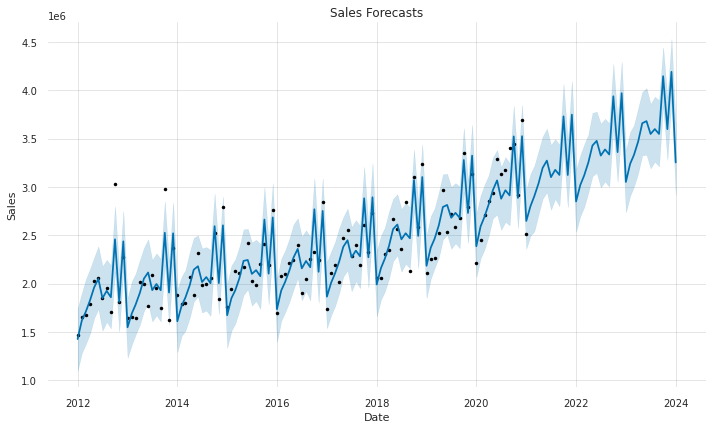

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
df_v_model.plot(df_v_forecast, xlabel="Date", ylabel="Sales")
plt.title("Sales Forecasts")

In [26]:
df_v = df.groupby(pd.Grouper(freq="MS", key="date"))["bottles_sold"].sum().reset_index()

df_v = df_v.rename(columns={"date": "ds", "bottles_sold": "y"})
df_v = df_v[df_v.ds.gt("2018-01-01")]
df_v = df_v.rename(columns={"date": "ds", "bottles_sold": "y"})
df_v_model = Prophet(interval_width=0.95)
df_v_model.fit(df_v)

df_v_forecast = df_v_model.make_future_dataframe(periods=18, freq="MS")
df_v_forecast = df_v_model.predict(df_v_forecast)

Text(0.5, 1.0, 'bottles_sold Forecasts')

<Figure size 1296x432 with 0 Axes>

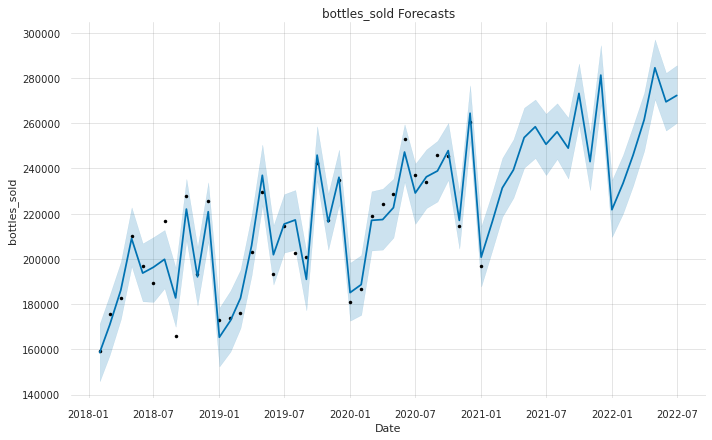

In [27]:
plt.figure(figsize=(18, 6))
df_v_model.plot(df_v_forecast, xlabel="Date", ylabel="bottles_sold")
plt.title("bottles_sold Forecasts")